In [1]:
import re, string,os
from glob import glob as gb
import pandas as pd
from collections import Counter
from tqdm import tqdm
from datetime import datetime, timedelta, date
from collections import OrderedDict
import subprocess
from utils.functions import *
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

plotting.style()

In [27]:
# Line Plot 'Bureaucracy' split by party
freqdata = data_loader.subset(start_date=1957,end_date=1985,words=['bureaucracy'])
freqdata = frequency.information(freqdata,period_format="year")
freqdata = frequency.distribution(freqdata,metadata_selectors=["speech_member_party"])
freqdata = frequency.normalization(freqdata,'/media/ruben/Elements/PhD/data/hansard/resources/character_counts_year_pm.csv')
freqdata = freqdata[freqdata['speech_member_party'].isin(['Conservative','Labour'])].reset_index(drop=True)

In [28]:
freqdata_ = freqdata.pivot(index='date',columns='speech_member_party',values='bureaucracy_hits').reset_index()
freqdata_['date'] = freqdata_['date'].astype(int)

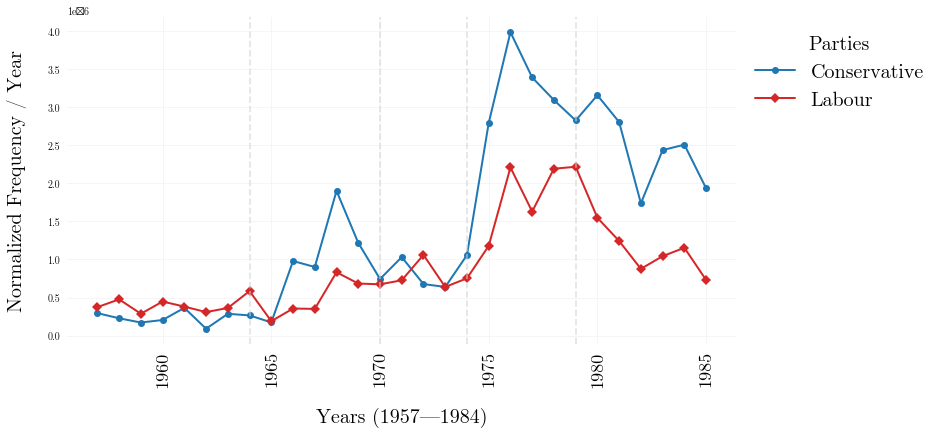

In [29]:
# Plot
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(freqdata_['date'], freqdata_['Conservative'],color='tab:blue',linewidth=2,marker='o')
plt.plot(freqdata_['date'], freqdata_['Labour'],color='tab:red',linewidth=2,marker='D')

freqdata_['date'] = freqdata_['date'].astype(int)
plt.xlabel("Years (1957—1984)",labelpad=20)
plt.ylabel("Normalized Frequency / Year",labelpad=20)
ax.legend(labels=['Conservative','Labour'], title="Parties",fontsize=20,bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(fontsize=18, rotation=90)

plt.axvline(x=1964,linestyle='dashed',color='lightgrey',alpha=.6)
plt.axvline(x=1970,linestyle='dashed',color='lightgrey',alpha=.6)
plt.axvline(x=1974,linestyle='dashed',color='lightgrey',alpha=.6)
plt.axvline(x=1979,linestyle='dashed',color='lightgrey',alpha=.6)

plt.savefig("/home/ruben/Documents/GitHub/CrisisBureaucracy/results/plots/freq-bureaucracy-annotated-line-party.pdf",dpi=250,bbox_inches='tight')
plt.show()

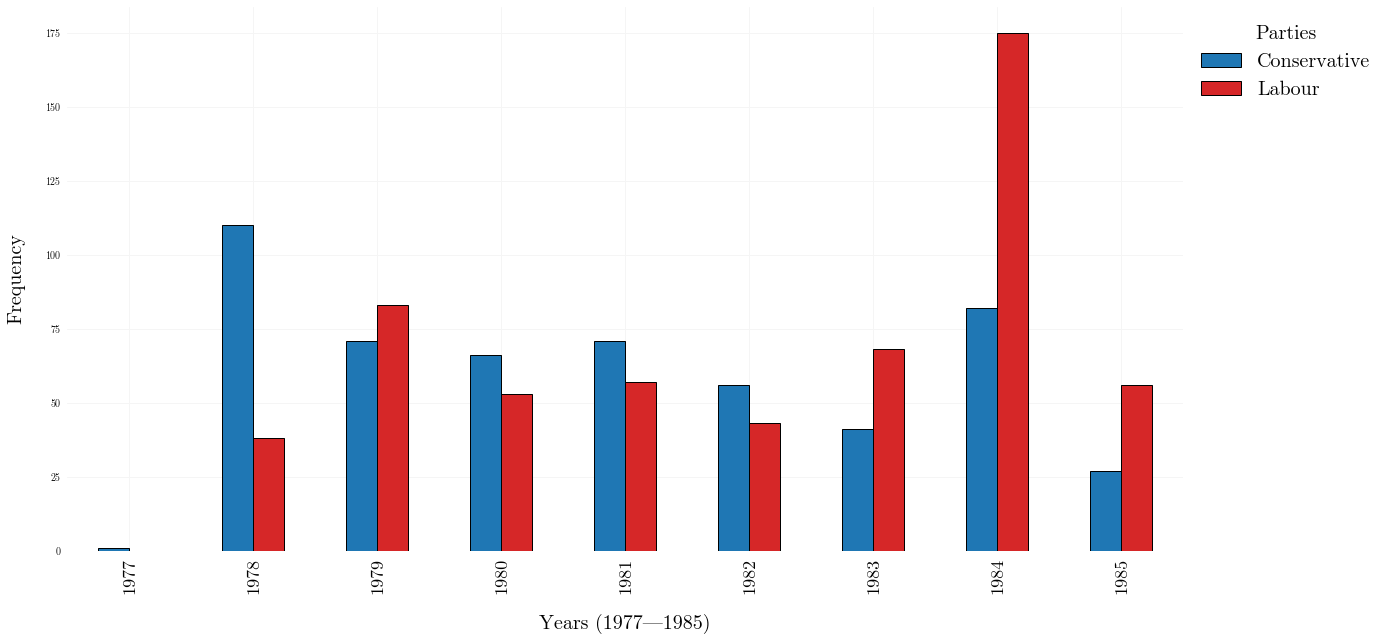

In [30]:
# Absolute Frequency 'Quango' compared / party
d = pd.DataFrame()

def get(word,year):
    grp = f'egrep -iE "{word}"  /media/ruben/Elements/PhD/data/hansard/lemmatized_pm/*{year}*'
    output = subprocess.check_output(grp,shell=True).decode('utf-8')
    output = [l.split('\t') for l in output.split('\n')]
    d = pd.DataFrame(output).iloc[:,[0,8,9,11]]
    d.columns = "id name party text".split(' ')
    return d

for y in range(1977,1986):
    d = d.append(get("quango",y))

d = d.dropna().reset_index(drop=True)
d['id'] = d['id'].str.split('/').str[-1].str.split('.').str[3].str[:4].astype(int)
d['n'] = 1
d = d.groupby(['party','id']).sum().reset_index().pivot(index='id',columns='party',values='n').reset_index().fillna(0)[['id','Conservative','Labour']]

fig, ax = plt.subplots(figsize=(4,2))
d.plot.bar(x='id',y=['Conservative','Labour'],figsize=(20,10),stacked=False,color=['tab:blue','tab:red'],ax=plt.gca(),edgecolor='black',linewidth=1)
ax.legend(labels=['Conservative','Labour'], title="Parties",fontsize=20,bbox_to_anchor=(1, 1), loc='upper left')

plt.xlabel("Years (1977—1985)",labelpad=20)
plt.ylabel("Frequency",labelpad=20)
plt.xticks(fontsize=18, rotation=90)
plt.savefig("/home/ruben/Documents/GitHub/CrisisBureaucracy/results/plots/freq-quango-party-comp.pdf",dpi=250,bbox_inches='tight')
plt.show()

In [23]:
# Formfilling, paperwork and red tape plots
freqdata = data_loader.subset(start_date=1957,end_date=1985,words="form filling,red tape,paper work,a bureaucracy,unnecessary bureaucracy,bureaucracy go mad".split(','))
freqdata = frequency.information(freqdata,period_format="year")
freqdata = frequency.distribution(freqdata,metadata_selectors=["speech_member_party"])
freqdata = frequency.normalization(freqdata,'/media/ruben/Elements/PhD/data/hansard/resources/character_counts_year_pm.csv')
freqdata = freqdata[freqdata['speech_member_party'].isin(['Conservative','Labour'])].reset_index(drop=True)

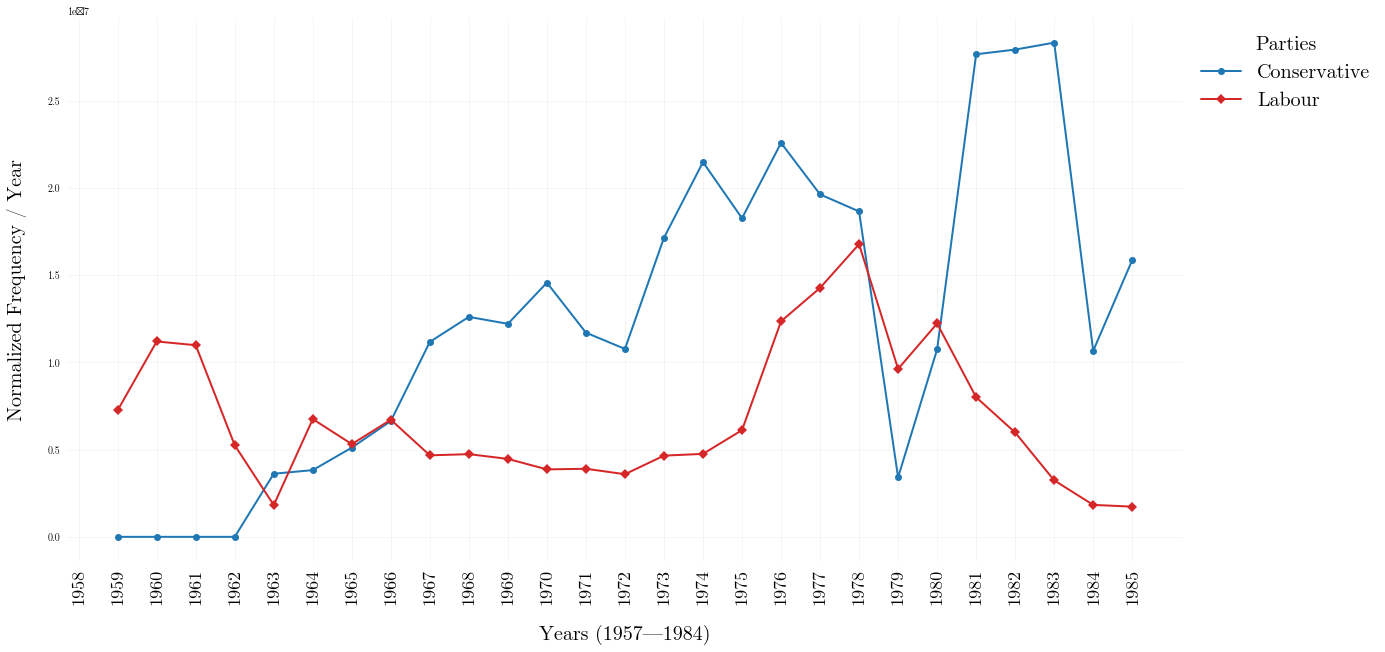

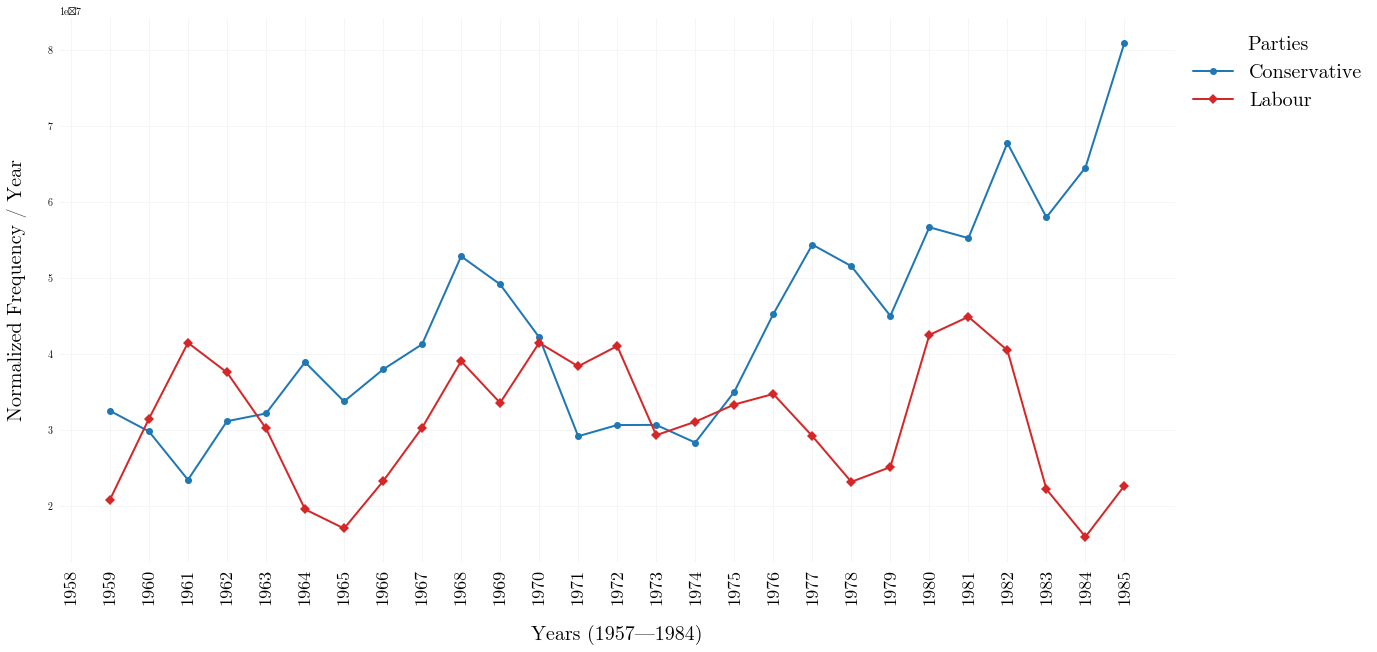

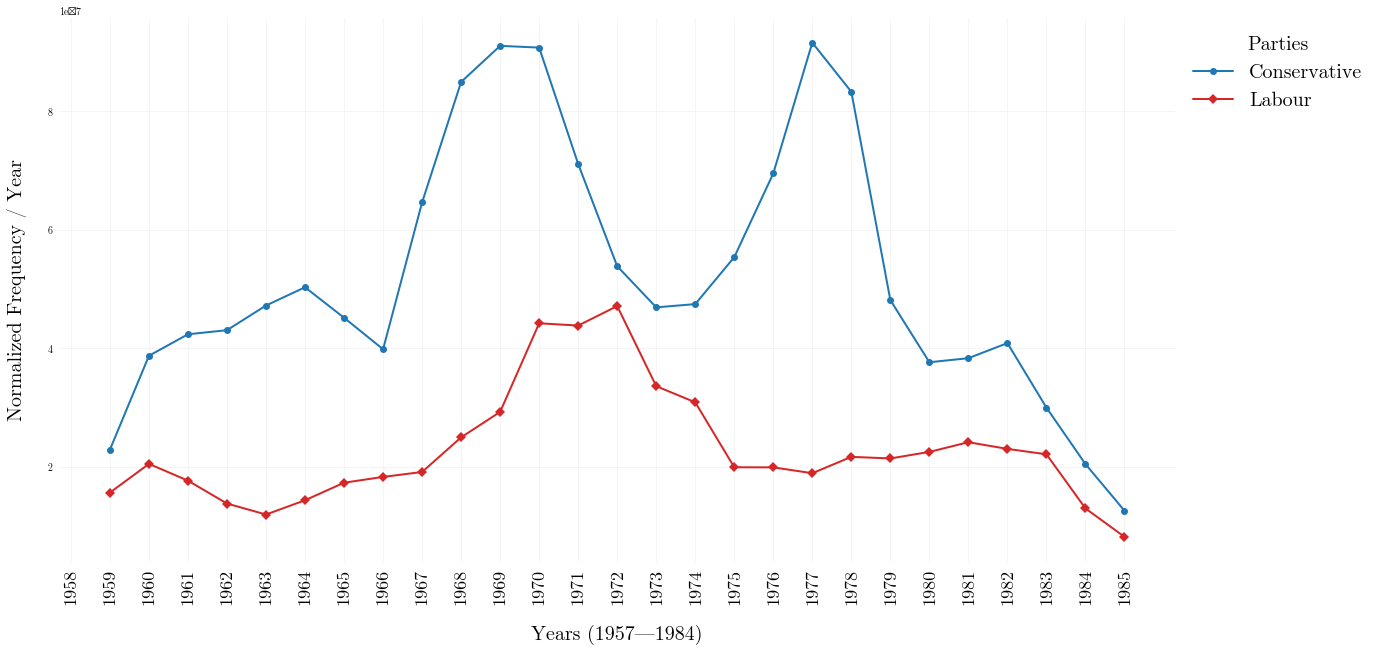

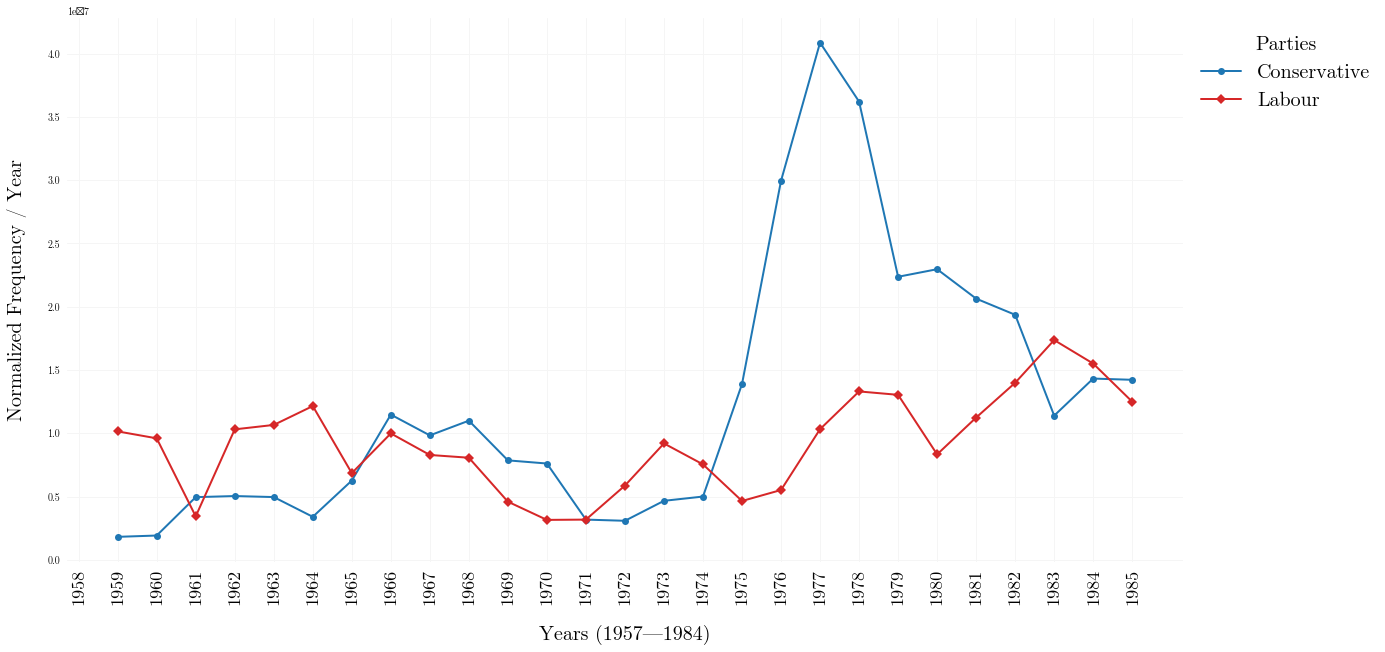

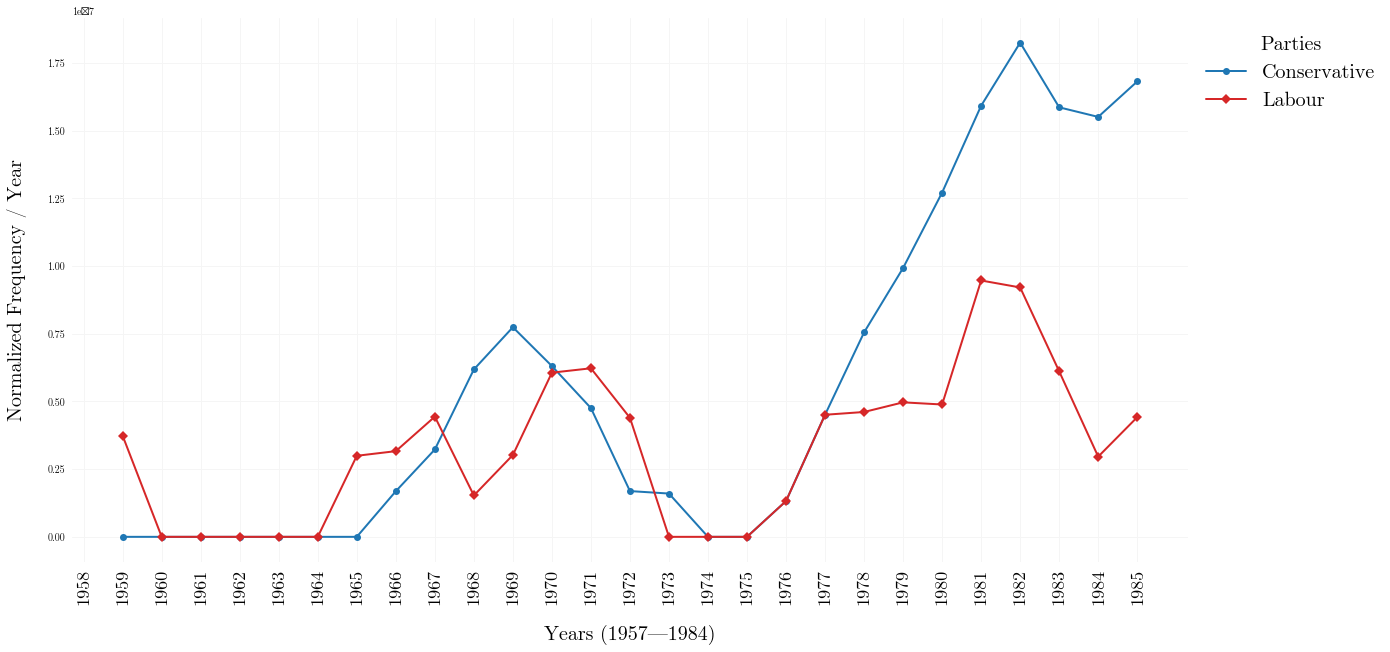

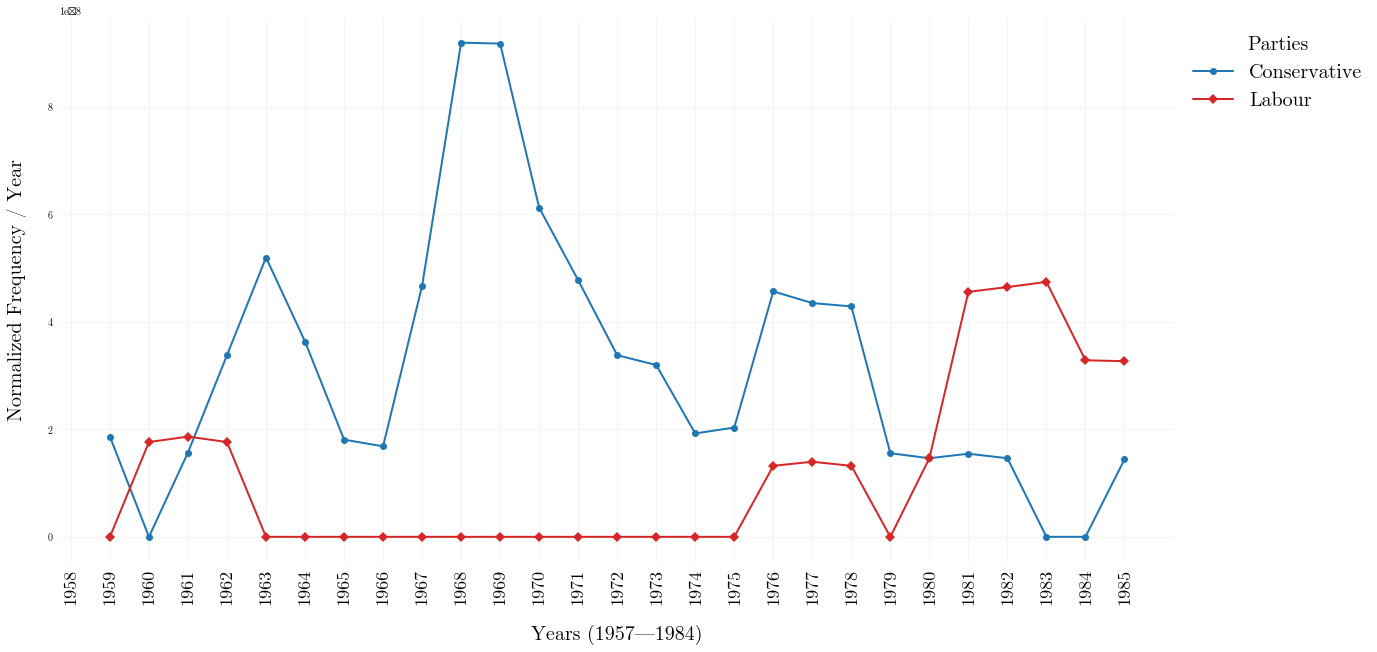

In [25]:
for ngram in "form filling,red tape,paper work,a bureaucracy,unnecessary bureaucracy,bureaucracy go mad".split(','):
    cl = ngram+"_hits"
    f = freqdata["date,speech_member_party".split(',') + [cl]]
    f = f.pivot(index='date',columns='speech_member_party',values=cl).reset_index()

    for c in ['Conservative','Labour']:
        f[c] = f[c].rolling(3, win_type='gaussian').sum(std=3)
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(f['date'], f['Conservative'],color='tab:blue',linewidth=2,marker='o')
    plt.plot(f['date'], f['Labour'],color='tab:red',linewidth=2,marker='D')

    f['date'] = f['date'].astype(int)
    plt.xlabel("Years (1957—1984)",labelpad=20)
    plt.ylabel("Normalized Frequency / Year",labelpad=20)
    ax.legend(labels=['Conservative','Labour'], title="Parties",fontsize=20,bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(fontsize=18, rotation=90)
    plt.savefig(f"/home/ruben/Documents/GitHub/CrisisBureaucracy/results/plots/freq-{ngram.replace(' ','')}-rel-bar-party.pdf",dpi=250, bbox_inches='tight')
    plt.show()

In [9]:
# NOUN / ADJECTIVE Ratio
plotting.style()

freqdata = data_loader.subset(start_date=1957,end_date=1985,words="bureaucracy,bureaucratic,democracy,democratic,government,governmental,political,politics,administration,administrative".split(','))
freqdata = frequency.information(freqdata,period_format="year")
freqdata = frequency.distribution(freqdata,metadata_selectors=[])
freqdata = frequency.normalization(freqdata,'/media/ruben/Elements/PhD/data/hansard/resources/character_counts_year_pm.csv')
freqdata['rb'] = freqdata['bureaucratic_hits'] / freqdata['bureaucracy_hits']
freqdata['rs1'] = freqdata['democratic_hits'] / freqdata['democracy_hits']
freqdata['rs2'] = freqdata['governmental_hits'] / freqdata['government_hits']
freqdata['rs3'] = freqdata['administrative_hits'] / freqdata['administration_hits']
freqdata['rs4'] = freqdata['political_hits'] / freqdata['politics_hits']

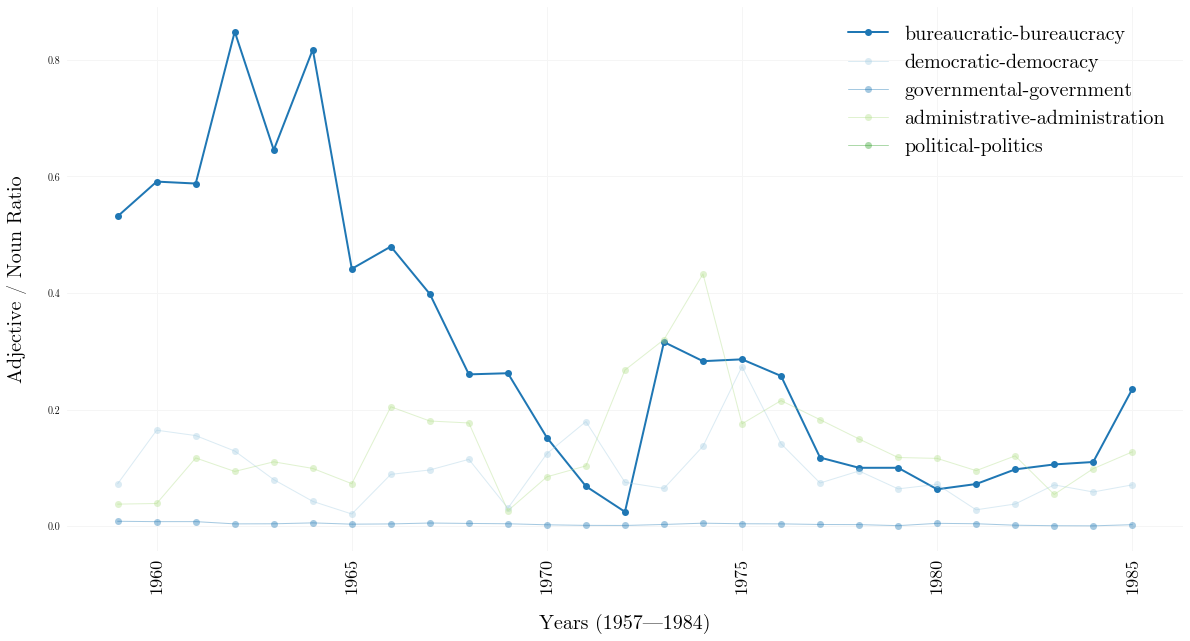

In [18]:
f = freqdata
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(f['date'], f['rb'].rolling(3).std(),color='tab:blue',linewidth=2,marker='o')
plt.plot(f['date'], f['rs1'].rolling(3).std(),linewidth=1,marker='o',alpha=0.4)
plt.plot(f['date'], f['rs2'].rolling(3).std(),linewidth=1,marker='o',alpha=0.4)
plt.plot(f['date'], f['rs3'].rolling(3).std(),linewidth=1,marker='o',alpha=0.4)
plt.plot(f['date'], f['rs4'].rolling(3).std(),linewidth=1,marker='o',alpha=0.4)


f['date'] = f['date'].astype(int)
plt.xlabel("Years (1957—1984)",labelpad=20)
plt.ylabel("Adjective / Noun Ratio",labelpad=20)
plt.xticks(fontsize=18, rotation=90)
plt.legend(["bureaucratic-bureaucracy","democratic-democracy","governmental-government","administrative-administration","political-politics"],fontsize=20)
plt.savefig(f"/home/ruben/Documents/GitHub/CrisisBureaucracy/results/adj-noun-ratio-bureaucracy-r3.pdf",dpi=250, bbox_inches='tight')
plt.show()

In [2]:
# Productivity Bureaucratic-vocab
data = data_loader.subset(start_date=1957,end_date=1985,words="bureaucratic".split(','))
data['text_lemmatized'] = utils.preprocess_(data['text_lemmatized'])

In [3]:
d = [[[data['id'][c2].split('.d.')[1][:4],data['speech_member_party'][c2],t.split(' ')[c+1]] if c + 1 < len(t.split(' ')) else '' for c,x in enumerate(t.split(' ')) if x == 'bureaucratic'] for c2,t in enumerate(data['text_lemmatized'])]
d = [item for sublist in d for item in sublist]
d = pd.DataFrame(d,columns="year party ngram".split(' ')).dropna()
d['n'] = 1

In [4]:
dp = pd.DataFrame([[y,len(d[d['year'] == y])] for y in list(set(d['year'])) if y != None],columns="year n".split(' ')).sort_values('year').reset_index(drop=True)

In [8]:
dp.columns = ['date',"productivity_hits"]
dp = frequency.normalization(dp,'/media/ruben/Elements/PhD/data/hansard/resources/character_counts_year_pm.csv')

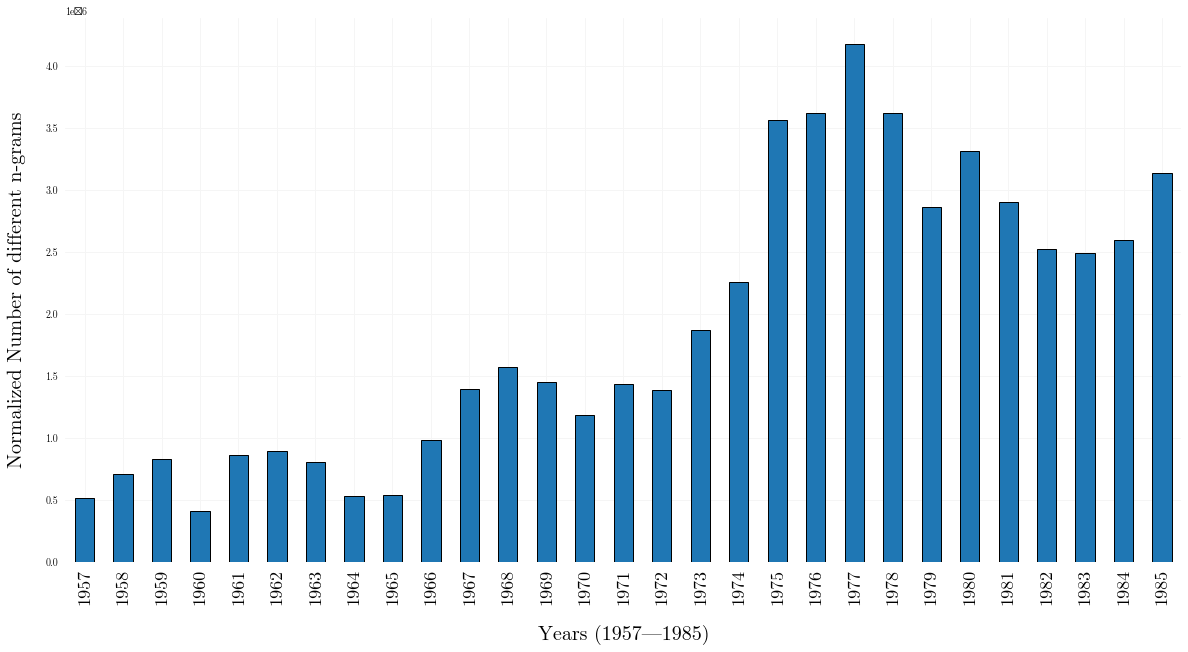

In [12]:
fig, ax = plt.subplots(figsize=(4,2))
dp.plot.bar(x='date',y='productivity_hits',figsize=(20,10),stacked=False,color='tab:blue',ax=plt.gca(),edgecolor='black',linewidth=1,legend=False)
plt.xlabel("Years (1957—1985)",labelpad=20)
plt.ylabel("Normalized Number of different n-grams",labelpad=20)
plt.xticks(fontsize=18, rotation=90)
plt.savefig("/home/ruben/Documents/GitHub/CrisisBureaucracy/results/plots/productivity-bureaucratic-x.pdf",dpi=250,bbox_inches='tight')
plt.show()